In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions.k_means_clustering import kmeans, kmeans_multiple_runs
from metrics.internal_metrics import compute_all_metrics, print_metrics


# K-means Clustering Test - Dortmund


In [13]:
data = pd.read_csv('dataset/Dortmund_features_preprocessed.csv', index_col=0)
features = data.values
subject_ids = data.index.values

print(f"Data shape: {features.shape}")
print(f"Number of subjects: {len(subject_ids)}")
print(f"Number of features: {features.shape[1]}")


Data shape: (600, 100)
Number of subjects: 600
Number of features: 100


# Single K-means Run


Iteration 0: average loss = 121.781885
Iteration 1: average loss = 73.388378
Iteration 2: average loss = 72.733774
Iteration 3: average loss = 72.621027
Iteration 4: average loss = 72.580622
Iteration 5: average loss = 72.579628
Iteration 6: average loss = 72.579628
Converged after 7 iterations

Converged: True
Iterations: 7
Final loss: 72.5796
Cluster sizes: [168 213 219]


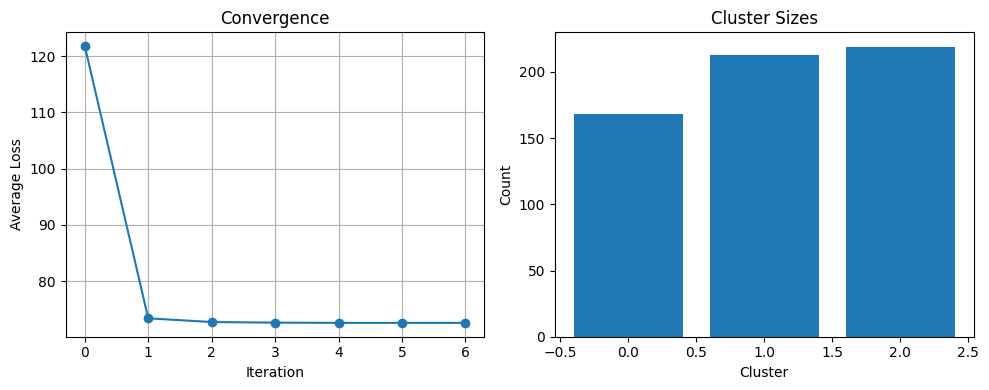

In [5]:
result = kmeans(features, k=3, max_iters=100, threshold=1e-5,
                verbose=True, random_state=42)

print(f"\nConverged: {result['converged']}")
print(f"Iterations: {result['n_iterations']}")
print(f"Final loss: {result['losses'][-1]:.4f}")
print(f"Cluster sizes: {np.bincount(result['assignments'])}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(result['losses'], marker='o')
plt.xlabel('Iteration')
plt.ylabel('Average Loss')
plt.title('Convergence')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(range(len(np.bincount(result['assignments']))),
        np.bincount(result['assignments']))
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Sizes')
plt.tight_layout()
plt.show()


# Internal Validation Metrics


In [16]:
metrics = compute_all_metrics(features, result['assignments'], include_dunn=False)
print_metrics(metrics)


Internal Validation Metrics:
--------------------------------------------------
  Silhouette Score:         0.0612
    Range: [-1, 1], Higher is better
  Davies-Bouldin Index:     2.5024
    Range: [0, ∞), Lower is better
  Calinski-Harabasz Score:  34.9376
    Range: [0, ∞), Higher is better
  Within-Cluster Variance:  34989.1306
    Lower is better
  Cluster Compactness:
    Cluster 0: 8.6170
    Cluster 1: 9.5370
    Cluster 2: 7.1140
    Cluster 3: 8.6113
    Cluster 4: 8.0970
    Cluster 5: 7.3455
    Cluster 6: 6.9963
    Cluster 7: 7.8117
    Cluster 8: 6.8925
    Cluster 9: 6.8497


# Multiple Runs


In [17]:
best_result = kmeans_multiple_runs(features, k=3, n_runs=10, max_iters=100,
                                   threshold=1e-5, verbose=False, random_state=42)

print(f"Best run: {best_result['best_run']}")
print(f"Best loss: {best_result['losses'][-1]:.4f}")
print(f"Cluster sizes: {np.bincount(best_result['assignments'])}")

metrics_best = compute_all_metrics(features, best_result['assignments'], include_dunn=False)
print(f"\nBest run metrics:")
print(f"  Silhouette: {metrics_best['silhouette_score']:.4f}")
print(f"  Davies-Bouldin: {metrics_best['davies_bouldin_score']:.4f}")


Best run: 10
Best loss: 71.8688
Cluster sizes: [252 261  87]

Best run metrics:
  Silhouette: 0.1274
  Davies-Bouldin: 2.3663


# Compare Different K Values - random trying later replaced with optimal k selection (elbow method, ...)


Testing different k values...
k=2: Silhouette=0.1319, Davies-Bouldin=2.3959
k=3: Silhouette=0.0926, Davies-Bouldin=2.6686
k=4: Silhouette=0.0892, Davies-Bouldin=2.4012
k=5: Silhouette=0.0855, Davies-Bouldin=2.4447
k=6: Silhouette=0.0658, Davies-Bouldin=2.4608


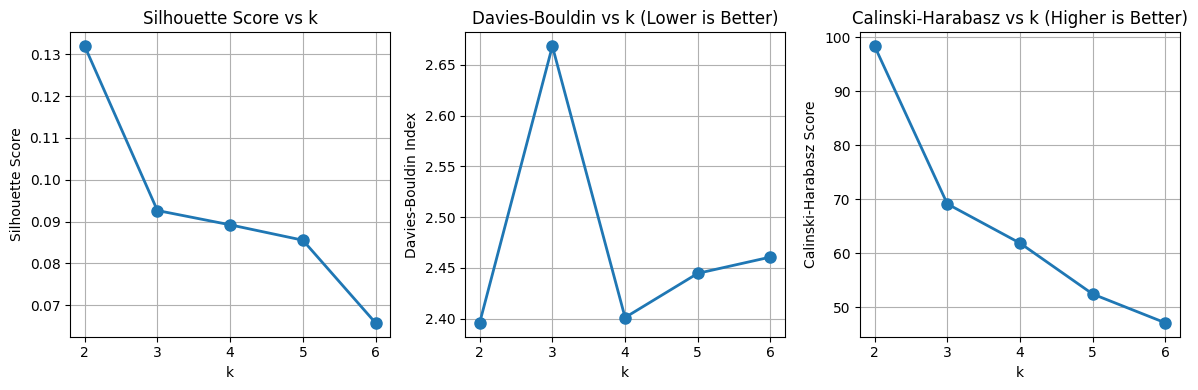

In [18]:
k_values = [2, 3, 4, 5, 6]
results_k = {}

print("Testing different k values...")
for k in k_values:
    result_k = kmeans(features, k=k, max_iters=100, threshold=1e-5,
                     verbose=False, random_state=42)
    metrics_k = compute_all_metrics(features, result_k['assignments'], include_dunn=False)
    results_k[k] = {'result': result_k, 'metrics': metrics_k}
    print(f"k={k}: Silhouette={metrics_k['silhouette_score']:.4f}, "
          f"Davies-Bouldin={metrics_k['davies_bouldin_score']:.4f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
silhouettes = [results_k[k]['metrics']['silhouette_score'] for k in k_values]
plt.plot(k_values, silhouettes, 'o-', linewidth=2, markersize=8)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.grid(True)
plt.xticks(k_values)

plt.subplot(1, 3, 2)
db_scores = [results_k[k]['metrics']['davies_bouldin_score'] for k in k_values]
plt.plot(k_values, db_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin vs k (Lower is Better)')
plt.grid(True)
plt.xticks(k_values)

plt.subplot(1, 3, 3)
ch_scores = [results_k[k]['metrics']['calinski_harabasz_score'] for k in k_values]
plt.plot(k_values, ch_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz vs k (Higher is Better)')
plt.grid(True)
plt.xticks(k_values)

plt.tight_layout()
plt.show()
